<a href="https://colab.research.google.com/github/SimonOlshanCantin/Ok/blob/main/Position_Radiation_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#install radiation simulator
!pip install git+https://github.com/nasa/radbelt.git  
#install orbit simulator (old commit that works w python 3.7)
!pip install git+https://github.com/pytroll/pyorbital.git@cbe67e2f1136b5fb1fe6935f628845315abb6886  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/nasa/radbelt.git to /tmp/pip-req-build-khkzj03q
  Running command git clone -q https://github.com/nasa/radbelt.git /tmp/pip-req-build-khkzj03q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pytroll/pyorbital.git (to revision cbe67e2f1136b5fb1fe6935f628845315abb6886) to /tmp/pip-req-build-q7htaf58
  Running command git clone -q https://github.com/pytroll/pyorbital.git /tmp/pip-req-build-q7htaf58
  Running command git rev-parse -q --verify 'sha^cbe67e2f1136b5fb1fe6935f628845315abb6886'
  Running command git fetch -q https://github.com/pytroll/pyorbital.git cbe67e2f1136b5fb1fe6935f628845315abb6886
  Running command git checkout -q cbe67e2f1136b5fb1fe6935f62884

In [5]:
from radbelt import get_flux
from astropy import units as u
from astropy.coordinates import EarthLocation
from astropy.time import Time
from pyorbital.orbital import Orbital
from datetime import datetime
import numpy as np   
import pandas as pd 
import math as mt
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


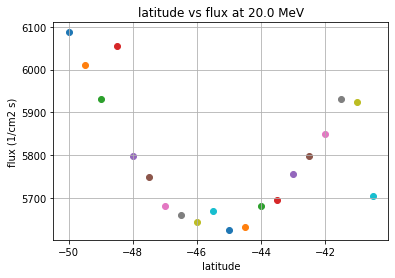

In [ ]:
#User inputs: coordinates, energy, date
for latitude in np.arange(-50,-40,0.5):
  coords = EarthLocation(latitude * u.deg, -30 * u.deg, 800 * u.km)     #presumeabily latitude, longitude, altitude? 'u' 4 universal? When km^ flux^ -> prob altitude
  time = Time('2022-03-01')
  energy = 20 * u.MeV

#actual function
  flux = get_flux(coords, time, energy, 'p', 'max')    
#Plotting like Ronald Reagan baby
  plt.scatter(latitude, flux) 
  plt.xlabel('latitude')
  plt.ylabel('flux (1/cm2 s)')
  plt.title('latitude vs flux at '+ str(energy))
  plt.grid(visible = True)
else:
  plt.show()                            

#**Goal**
output: latitude vs longitude map w radiation represented by a color gradient

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2246: RuntimeWarning: invalid value encountered in aep8 (vectorized)
  outputs = ufunc(*inputs)


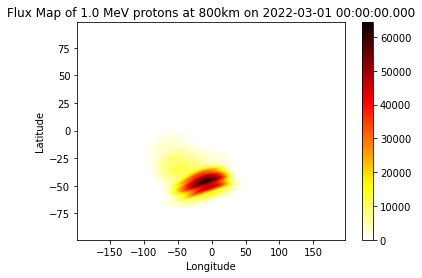

In [ ]:
#inputs:
altitude = 800
energy = 1 * u.MeV
time = Time('2022-03-01')
jump_size = 1   #this doesn't neccessarily have to be an input but i had a dream about it so here it is. Describes the step size moving along long/lat lines

#define our three empty lists
latitude_list = []
longitude_list = []
flux_list = []

#create an empty dictionary
data = {'Latitudes': latitude_list,'Longitudes': longitude_list, 'Fluxes':flux_list}

for longitude in np.arange(-180,180,jump_size):   #we want to go down each longitude line, taking 0.5 (2atm) degree steps -> we can find radiation at every intersection
  for latitude in np.arange(-90,90,jump_size):
    latitude_list.append(latitude)    #append new latitude to latitude list
    longitude_list.append(longitude)  #append SAME longitude to longitude lists -> keeps all lists the same lenght as radiation list, which is good 
                                      # because when we plot we're going to want a list of (x,y,z) co-ordinates
    coords = EarthLocation(longitude * u.deg, latitude * u.deg, altitude * u.km)
    flux = get_flux(coords, time, energy, 'p', 'max')       #find flux at those coordinates

    flux_list.append(flux)       #append flux to the end of flux list -> dataframe should have: latitude, longitude, flux (x,y,z)

    data = {'Latitudes': latitude_list,'Longitudes': longitude_list, 'Fluxes':flux_list} #save list updates into our dictionary    
else:
  datamap = pd.DataFrame(data)  #save dictionary as a dataframe
  #print(datamap)    #just checking
  color_array = np.array(datamap['Fluxes']) #convert flux column of dataframe into numpy array
  unitless_flux_list = []       #create empty list

  for i in color_array.flat:
    unitless_flux_list.append(i.value)  #fill empty list with unitless flux values
  else:
    #all this is just plotting    
    #fig = plt.figure(figsize=(10, 10)) 
    plt.scatter(datamap['Longitudes'], datamap['Latitudes'],c = unitless_flux_list, cmap="hot_r") 
    #^plots! x is longitude, y is latitude, color is flux
    plt.colorbar()
    plt.xlabel('Longitude')          
    plt.ylabel('Latitude')
    plt.title('Flux Map of ' + str(energy) + ' protons at ' + str(altitude) + 'km on ' + str(time))
    plt.show()

#**Goal**
**input:** satalite, time

**Output:** Position, df w energy vs flux

#**Goal:**
**Inputs:** altitude, inclination, trajectory duration, start date (simplified by removing ellipticity, start time, and argument of perigee

**Outputs:** flux at a specific energy as a function of time, measured ~every 20 minutes

**NB:** date changes as time changes